# AMAT502:  Lecture 22. Numerical Optimization. 

April 4, 2019.

Michael Lamoureux

In [1]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from math import tau
from matplotlib.pyplot import *

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import *
from matplotlib import cm


## Why optimization in an applied math course.

Optimization comes up all over the place in applications. What is the best design for an airplane wing? What is the best way to move dirt when constructing a road (fastest way to move it? cheapest way to move it? Move it with the least environmental damage?)

Often we will use it in inverse problems and imaging. So, we have a model, say, of the human body, with some unknown parameters -- like how fat is the fat? How thick are the bones? How big is the heart? An inverse problem tries to find the best fit of the model to the recorded data. Next week we will talk about inverse problems, so we want to be able to have a tool to do the "best fit" operation.

## Introduction to optimization

The point is, in many applied problems, there is some step where we need to find the maximum or minimum of a function. There are many robust ways to do this. 

So let's do a quick summary of some of the standard optimization methods, keeping in mind that we likely will just be using them as software that someone else has written. 

## Categories of optimization

1. Continuous versus discrete optimization
 - is the variable $x$ in $f(x)$ a real-valued variable, or real-valued vector (continuous case) versus a discrete variable (like integer-valued, or a set of vertices on a graph, etc.)
 
2. Unconstraited versus contrained optimization
 - is the variable $x$ in $f(x)$ allowed to take any value on the real line, or any value in a vector space like $R^n$? (unconstrained case), or are there constraints like $x \geq 0$ or $g(x) = 0$. (constrained case)
 
3. One-dimensional, low dimensional, or high dimensional
 - is the variable $x$ just a point on the line (1D), or a vector in a low-D vector space like $R^3$ or $R^4$, or is $x$ a vector in, say, a 10,000 dimensional vector space. 
 
4. Convex versus non-convex function
 - convex functions are easier to minimize, as they have at most one minimum value. 
 
4. Can we solve via an algebraic methods?
 - for instance, solving for the gradient $\nabla f (x) = 0$ might be a simple algebraic problem. (e.g. if $f$ is a quadratic function , then its gradient is a linear function of $x$ and we can solve with linear algebra). 
 
5. Otherwise, we are forced to use numerical methods.

## Important numerical methods

1. Line searches (1D optimization, often a step in higher-dimensional optimization)
 - golden section 
 - bisection method 
 - Newton's method
 
2. Gradient methods in higher D
 - steepest descent
 - conjugate gradient
 - with Hessian (2nd derivative information)
 - with constraints
 
3. Simplex method
 - for linear functions $f(x)$ with linear constraints like $x_k \geq 0$, $g(x) \geq 0$, $h(x) = 0$. 
 - works on the fact the constrained set is a polytope, so we can travel around the edges to get the maximizeing vertex on the polytope. 
 
4. Simulated annealing
 - a randomized process, that is related to the physical process of a hot object cooling down slowly (annealing)
 
5. Random walks
 - useful for investigating the constraint set in an efficient manner

 
## Important facts about numerical methods

1. These methods are all **iterative**. Usually the algorithm starts with an initial guess for the solution, then applies some logic to get to a "better place." That is, it tries to find a new point $x$ so that $f(x)$ has a lower value than last time. Then you repeat this process many times, until you get an answer that doesn't seem to change much, or doesn't reduce $f(x)$ any more. You then guess or hope you are at the minimum.

2. So iteratives may be repeated many times. Each time, you have to evaluate $f(x)$. So you do have to worry about how "hard" it is to compute the function $f(x)$. For instance, $f(x)$ might be the result of some long, complex simulation. (Say, a computer model of an airplane, where you are trying to optimize the lift of the wing.) An algorithm that compute $f(x)$ many times might be really slow.

3. The algorithms typically stop when the $f(x)$ value stops getting smaller. This doesn't mean that you are at the minimum, just that the algorithm can't do any better. Often, this is good enough. For complicated functions, this may NOT be enough. For instance, if $f(x)$ has many local minimum, the algorithm might stop at one local min, and miss the global minimum. 

4. If you have derivative information, like first derivatives $\mbox{grad}(f)$ or 2nd derivatives $\mbox{Hess}(f)$, then there are faster algorithms. However, in many applications you don't have these derivatives, or they are very expensive to compute. 

5. Different numerical methods may be appropriate for different problems. 

# Numerical methods

We will focus on numerical methods for continuous, high dimensional problems. With or without contraints.


# Line searches in 1D

A line search often comes up in higher dimensional problems. Suppose $f(\mathbf{x})$ is a real-valued function, where the variable $\mathbf{x}$ is a vector in some vector space $R^n$. An algorithm will pick a direction $\mathbf{v}$ to go in, and we get a 1D problem of minimizing along that direction. That is, we can write down a function 
$$f_0(t) = f(\mathbf{x}_0 + t\mathbf{v})$$
and just optimize with respect to the single variable real $t$. 

For instance, with $f(x,y) = x^2 + y^2$, we might start at $(x_0,y_0) = (1,1)$ and direction $\mathbf{v} = (1,0)$. Then we need to minimize the function
$$f_0(t) = f(\, (1,1) + t(1,0) \, ) = f(1 + t,1) = (1+t)^2 + 1,$$
which is a nice little quadratic. 

Here's a plot of the surface, and the quadratic above:


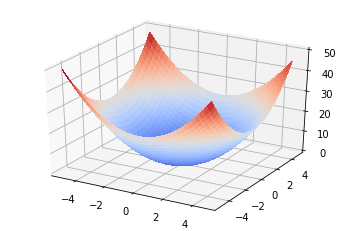

In [2]:
fig = figure()
ax = fig.gca(projection='3d')


X = arange(-5, 5, 0.25)
Y = arange(-5, 5, 0.25)
X, Y = meshgrid(X, Y)
Z = X**2 + Y**2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


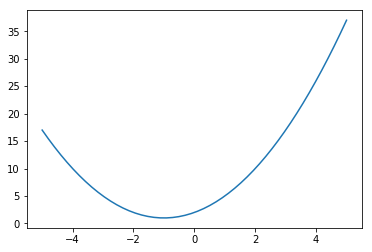

In [3]:
t = linspace(-5,5)
plot(t,(1+t)**2 + 1 );

## See the min?

Now, in the above plot, we can see the minimum is at $t=-1$. However, the computer typically does not "plot" a curve and look for a min. All it can do is evaluate the function at some points, and make decisions based on those values.

For instance, suppose we evaluate the above function at two points, say $t=2,4.$ See the graph below:

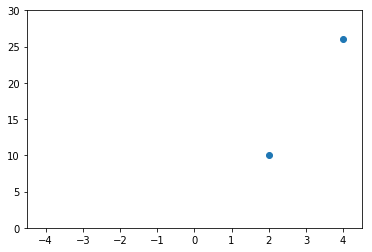

In [4]:
t0 = array([2,4])
plot(t0,(1+t0)**2 + 1, 'o')
xlim([-4.5,4.5])
ylim([0,30]);

These two points tell us something. The min has to be either between $t=2$ and $t=4$, or it is to the left of $t=2$. That is, the minimizer lies in the big interval $(-\infty,4]$. That's a big interval, but at least it is not the whole real line!

So, to get more info, let's evaluate at a point to the lefrt, say $t = -2$.

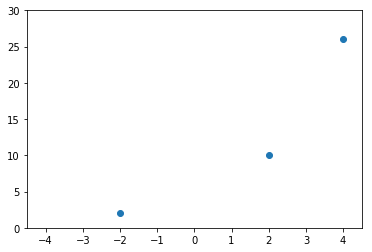

In [5]:
t0 = array([-2,2,4])
plot(t0,(1+t0)**2 + 1, 'o')
xlim([-4.5,4.5])
ylim([0,30]);

Well, look at these three points. If the function is convex, the minimum has to be to the left of $t=2$. That is, either it is between $-2$ and $2$ or it is to the left of $-2$. So the minimizer is in the interval $(-\infty,2]$ which is a little smaller than the last intervale, $(-\infty, 4]$. 

So we can throw away the 4 now, and pick a new point to left. Say $t=-4$.

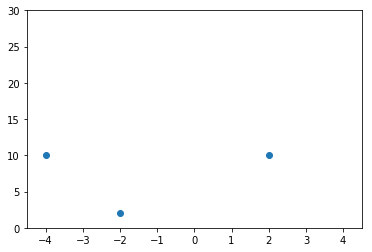

In [6]:
t0 = array([-4,-2,2])
plot(t0,(1+t0)**2 + 1, 'o')
xlim([-4.5,4.5])
ylim([0,30]);

Well, this is good. We know the minimizer lies between $-4$ and $2$. (Why?) That is, we know it is in the interval $[-4,2]$, which is reasonable small! But we want to make it smaller. 

So we pick another point, say $t=1$ and look at the picture:

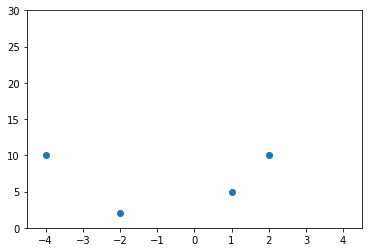

In [7]:
t0 = array([-4,-2,1,2])
plot(t0,(1+t0)**2 + 1, 'o')
xlim([-4.5,4.5])
ylim([0,30]);

Look at those 4 dots and think of trying to draw a convex function through it. The low point on the curve is either between the dots at $-4$ and $-2$, or between $-2$ and $1$. So we can through out the 4, and we have this picture:

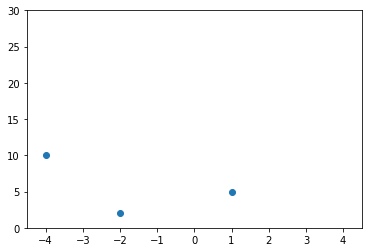

In [8]:
t0 = array([-4,-2,1])
plot(t0,(1+t0)**2 + 1, 'o')
xlim([-4.5,4.5])
ylim([0,30]);

Now we know the minimizer lies in $[-4,1]$. Which is an improvement over our last interval which was $[-4,2]$. 

## Iterate

Now you just iterate. Given the three points a < b < c with $f(b)$ smaller than $f(a),f(c)$, we add a fourth point and use some logic to throw away one of the end points.

How to choose that fourth point? Well, there is an optimal way, based on a length related to the golden ratio
$$\sigma = \frac{1 + \sqrt{5}}{2} = 1.6180...$$

For this reason, the method is called the Golden Section method. You can look it up on Wikipedia, but I want to stress that I don't want you to code this yourself. You should use good code from Scientific Python:

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.golden.html

Here is an example of how to call it, using the three "bracketing" points we discussed above, -4,-2,2.

In [9]:
from scipy.optimize import golden

def f0(t):
    return (1+t)**2 + 1

golden(f0,brack=(-4,-2,2),full_output=True)



(-0.9999999968218378, 1.0, 45)

It returned the minimizer, $t=-1$. The 45 is the number of iterations required to converge. 

Let's try it again, with a much wider initial bracket. Three points at $t=-1000,100,10000$.

In [10]:

golden(f0,brack=(-1000,100,10000),full_output=True)

(-1.0000000036729304, 1.0, 58)

## Iterations

This took 58 iterations. So pretty fast still

## The Brent method

The Brent method is a slight improvement over the Golden section method. Given those three bracketing points, Brent fills in an interpolating parabola, and uses that to find the next point.  Again, you can call code to do this.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.brent.html



In [11]:
from scipy.optimize import brent

brent(f0,brack=(-1000,100,10000),full_output=True)

(-0.9999999999999147, 1.0, 5, 9)

## Iterations

Here, the code took 5 iterations, and only 9 function evaluations. So, yes, pretty fast (compared to Golden Section method.)

# Derivative methods in 1D

If we are minimizing a 1D function -- that is, a function $f(t)$ of a single real variable, things get easier if we can compute the derivative. We know a local minimum will occur at places where $f'(t) = 0$. So we can just use a numerical root finding method to find zeros of the derivative.

## Bisection method

Here, the idea is to "trap" the zero between two point $t_0, t_1$ where the function $f'(t)$ is positive at one place, negative at the other. The zero has to lie in between. So compute the value at the midpoint, and this will give you a new, smaller interval where the root is trapped.

This works to find the zero for any continuous function, so we need to know the derivative $f'(t)$ is continuous. 

Here is an example of a function $f(t) = t^3 - t$, and we look for a minimum by looking for roots of the derivative $f'(t) = 3t^2 -1.$



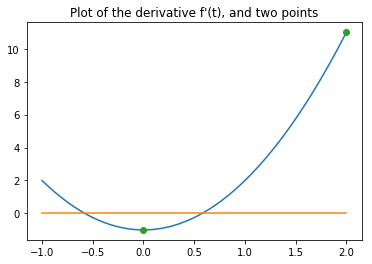

In [12]:
# Plot the derivative and the zero line, and two points above and below the zero line
t = linspace(-1,2)
plot(t,3*t**2 - 1,t,0*t,[0,2],[-1,11],'o');
title("Plot of the derivative f'(t), and two points");

In the graph above, we see $f'(0)$ is negative and $f'(0'$ is positive. So we know there is a zero in the interval $[0,2]$. We compute the function at the midpoint $(0+2)/2 = 1$, as follows. 


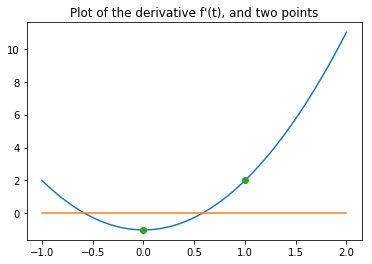

In [13]:
plot(t,3*t**2 - 1,t,0*t,[0,1],[-1,2],'o');
title("Plot of the derivative f'(t), and two points");

We see now that since $f'(1)$ is positive, and $f'(0)$ is negative, the root has to lie in the interval $[0,1]$

This interval is half the size of the previous interval, so we have bisected the interval where root lies. This is why this is called the bisection method. We iterate, and at each iteration, the size of the "trapping interval" is reduced by half. So this is a pretty fast way to find the root of the equation $f'(0) = 0$.

Here is the method in SciPy

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.bisect.html#scipy.optimize.bisect



In [14]:
from scipy.optimize import bisect

def f_der(t):
    return 3*t**2 - 1

bisect(f_der,0,2,full_output=True)

(0.5773502691899921,       converged: True
            flag: 'converged'
  function_calls: 42
      iterations: 40
            root: 0.5773502691899921)

### What to notice

1. It took 40 iterations to converge, 42 function calls
2. We had to input the derivative of f, not the function itself
3. It did converge to the minimizer, the square root of 1/3.
4. If we had started on the interval [-2,0], it would have converged to the maximizer, at negative sq rt 1/3

## Newton's method

Newton's method is an even faster way of finding zeros of a function. The idea is to follow the tangent line down the graph, to get to a closer approximation to the zero.

Here is the idea with the same function as above, where we plot the derivative $f'(t) = 3t^2 -1$ and start at the point $t_0=2$ on the graph. The next point is given by the formula
$$t_{n+1} = t_n - \frac{f'(t_n)}{f''(t_n)} = t_n - \frac{3t^2_n - 1}{6t_n}.$$

In this case, $t_1 = 2 - 11/12 = 13/12.$

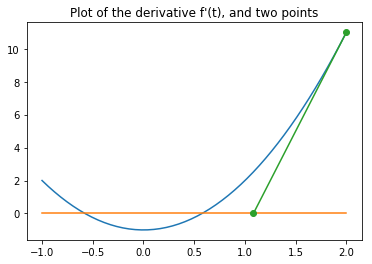

In [15]:
t = linspace(-1,2)
plot(t,3*t**2 - 1,t,0*t,[2,13/12],[11,0],'-o');
title("Plot of the derivative f'(t), and two points");

We then repeat this, to find
$$t_0 = 2, t_1 = 13/12, t_2 = 0.70 \, etc$$

Let's plot this, and we see it zigzags its way to the root of $f'$ very quickly. 

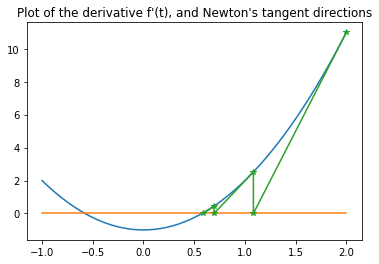

In [16]:
def f_der(t):
    return 3*t**2 - 1
t0 = 2
t1 = t0 - f_der(t0)/(6*t0)
t2 = t1 - f_der(t1)/(6*t1)
t3 = t2 - f_der(t2)/(6*t2)

t = linspace(-1,2)
plot(t,f_der(t),t,0*t,[t0,t1,t1,t2,t2,t3],[f_der(t0),0,f_der(t1),0,f_der(t2),0],'-*');
title("Plot of the derivative f'(t), and Newton's tangent directions");

The point is, this Newton's method of following the tangent line gets us to the zero of $f'(t)$ really fast.

The downside is that we need to know both the first and second derivatives for f, in order for this to work.

Of course, there is code for this. Just remember we are finding the zero of the **derivative** $f'(t)$.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton

Unfortunately, this method does not output information about number of iterations. So I put in a little hack here to count how many times the function f_der gets called. Can you see how the hack works?

In [17]:
from scipy.optimize import newton

n = 0

def f_der(t):  # derivative
    global n
    n = n+1
    return 3*t**2 - 1

def f_der2(t): # second derivative
    return 6*t

n= 0
newton(f_der,2,fprime= f_der2),n

(0.5773502691896258, 6)

### What to notice

1. We got the same answer, min is at 0.577
2. The function got called only 6 times, which is much fewer than the 42 in bisection method
3. We had to compute the second derivative as well.

However, if you don't have the 2nd derivative, Newtons' method with use instead the secant method. This takes two function evaluations to approximate a secant, which is usually close to the tangent.

Convergence rate for Newton's method is quadratic (fast!). For secant method, it is sub-quadratic, which is still pretty good. And critically useful if you aren't able to compute that extra derivatice. 

# Minimization in n-dimensions - Gradient methods

The gradient methods for minimization is the same method you use to climb down a mountain. Wherever you are, look around to see which direction is down, walk in that direction for a bit, then re-evaluate. Which way is down? Go in that direction. 

The "down" direction for a function $f(\mathbf{x})$ is the negative gradient
$$-\nabla f(\mathbf{x}) = -\left( \frac{df}{dx_1}, \frac{df}{dx_2}, \ldots, \frac{df}{dx_n}\right).$$ 

### Steepest descent:
The steepest descent says always go in the direction of the negative gradient. The algorithm goes like this:

0. We start at iteration $n=0$
1. Pick an initial point $\mathbf{x}_0$
2. Pick a direction $\mathbf{v}_n = -\nabla f(\mathbf{x}_n).$
3. Do a line search along that direction, to minimize $f_n(t) = f(\mathbf{x}_n + t\mathbf{v}_n).$
4. This 1D minimizer gives you a new point $\mathbf{x}_{n+1}$
5. Now repeat, going back to step 2, using this new point.

So this is steepest descent. However, it is so bad that nobody uses it!! The problem is the steepest descent tends to get stuck, like you can get stuck in long narrow valleys in the mountains.

Instead, a better method is to use what is called conjugate gradient descent. Here, the negative gradient is "corrected" by adding a fudge factor, which is a scalar times the previous search direction. 

### Conjugate gradient

The algorithm is this:

0. We start at iteration $n=0$
1. Pick an initial point $\mathbf{x}_0$
2. Pick a direction $\mathbf{v}_n = -\nabla f(\mathbf{x}_n) + \beta_n \mathbf{v}_{n-1},$ where $\beta_n$ comes from some magic formula.
3. Do a line search along that direction, to minimize $f_n(t) = f(\mathbf{x}_n + t\mathbf{v}_n).$
4. This 1D minimizer gives you a new point $\mathbf{x}_{n+1}$
4. Now repeat, going back to step 2, using this new point.

So all that has changed is step 2. Where does this $\beta_n$ come from? Well, it is computed from the gradient. Everybody and their sister has their favourite formula for $\beta$. Some popular ones are Fletcher–Reeves, Polak–Ribière, Hestenes-Stiefel and Dai–Yuan.

But you shouldn't care. You just want to call the code. 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_cg.html#scipy.optimize.fmin_cg



In [18]:
from scipy.optimize import fmin_cg

def f(x):
    return (x[0]-3.3)**2 + (x[1]-4.4)**4

fmin_cg(f, [0,0])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 108
         Gradient evaluations: 27


array([3.29999985, 4.39754774])

## What to notice

1. It found the true minimum at 3.3, 4.4
2. It took 8 iterations
3. It took 108 function evaluations
4. it took 27 gradient evaluations

Which is pretty weird, because we didn't define the gradient! The numerical methods actually tries to compute the gradient using finite differences.

In the following code, we include a gradient function


In [19]:
def f(x):
    return (x[0]-3.3)**2 + (x[1]-4.4)**4

def gradf(x):
    return array([2*(x[0]-3.3),4*(x[1]-4.4)**3])

fmin_cg(f, [0,0],fprime= gradf)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 27
         Gradient evaluations: 27


array([3.29999793, 4.39425149])

## What to notice
1. We found the same minimum
2. Still took 8 iteratons
3. Only 27 function evaluations this time
4. Still 27 gradient eveluations, but this time using our real gradient function

## The Rosenbrock function

This is a standard test function in 2D, used to test optimization routines. It has a banana-shaped valley that the steepest descent method tends to get stuck in. Let's plot it, so you can see what it looks like.

$$f(x,y) = (x-1)^2 + (y-x^2)^2.$$

It gives a better test of our optimization methods. 

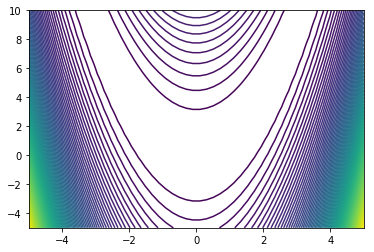

In [20]:
from scipy.optimize import rosen, rosen_der, rosen_hess

x = linspace(-5,5)
y = linspace(-5,10)
X,Y = meshgrid(x,y)
Z = rosen([X,Y])
contour(x,y,Z,100);

In [21]:
fmin_cg(rosen, [10,10])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 420
         Gradient evaluations: 105


array([0.99999552, 0.99999103])

In [22]:
fmin_cg(rosen,[10,10], fprime=rosen_der)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 44
         Function evaluations: 102
         Gradient evaluations: 102


array([1.00000007, 1.00000015])

## Things to notice

1. It found the minimum value, which is 0, at point (1,1)
2. With the derivative, it is even faster. Same iterations, fewer function evaluations.


## Quasi-Newton method of Broyden, Fletcher, Goldfarb, and Shanno (BFGS)

Here is another gradient method people like a lot. BFGS method. Let's just call it and see what happens. 

In [23]:
from scipy.optimize import fmin_bfgs

fmin_bfgs(rosen, [10,10])


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 87
         Function evaluations: 444
         Gradient evaluations: 111


array([0.99999612, 0.99999227])

In [24]:
fmin_bfgs(rosen, [10,10],fprime=rosen_der)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 87
         Function evaluations: 112
         Gradient evaluations: 112


array([1.00000018, 1.00000035])

## What to notice.

1. Both BFGS methods found the minimum
2. Without gradient, 444 function evaluation. With gradient,  112 function evaluations.
3. But conjugate gradient had 420 functions evals without grad, and 102 with grad.
4. So on this test, conjugate gradient and BFGS seem very similar. 

## Newton's method

The idea here is we compute the n by n matrix of second partials for the function f. This is called the Hessian, and it allows us to approximate f as a quadratic function of n variable. 

Of course, it is easy to find the minimum of a quadratic function (solve for the gradient equal to zero, which is a linear system). So the hope is that this method works better.

It is sort of like the Brent method, that approximates a 1D function with a parabola. Or like Newtons' method from 1D, where we need second derivative information to try to find zeros of the first derivatives. 

Again, don't code this up. Use other people's code instead. 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_ncg.html#scipy.optimize.fmin_ncg

In [25]:
from scipy.optimize import fmin_ncg

fmin_ncg(rosen, [10,10], fprime=rosen_der)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 80
         Gradient evaluations: 276
         Hessian evaluations: 0


array([1.00000003, 1.00000006])

In [26]:
fmin_ncg(rosen, [10,10], fprime=rosen_der, fhess=rosen_hess)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 83
         Gradient evaluations: 133
         Hessian evaluations: 51


array([1., 1.])

### What to notice?

You tell me. 

## Simulated annealing.

The word "annealing" comes from a process where you heat up metal and then cool it down slowly, to get the molecules to line up nicely. This makes the metal more ductile, and easy to work with.

In minimization, the idea is to have a particle that "bounces around" a lot, like it has high energy, searching for a global minimum. As it cools down, it takes smaller jumps, and hopefully settles into the exact global minimum.

Think of a function like the one shown in a following graph. It has lots of local minima, and the numerical techniques above might get you "stuck" in one of the local valleys. The "bouncing particle" might be better, as it has a chance to bounce out of a local valley and get to a lower spot.

In high dimensions, of course, the problem can get worse, with higher dimensional valleys to hop out of. 


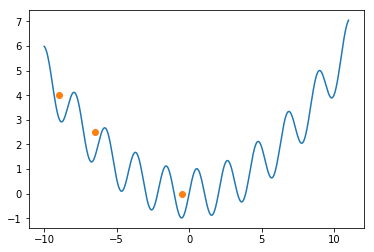

In [27]:
x = linspace(-10,11,1000)
y = .05*x**2 + sin(3*x)
plot(x,y,[-9,-6.5,-.5],[4,2.5,0],'o');

The algorithm works by starting at some initial point, then making "jumps" in random directions, with the size of the jump pick from a random distribution. If it finds the new point is a lower value for the function, you take that point as your new jumping-off spot. 

As time goes on, you decrease the mean size of the jumps (directions are still random). A big question is how fast you should decrease the mean size of jumps. This is where a lot of algorithmic "magic" happens.

Now, it is useful to know how this works, but rarely would you code it up yourself.

Interestingly, when you look on SciPy, it says this method is deprecated. Which means it is no longer in use. 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.anneal.html#scipy.optimize.anneal

## Basin hopping

People are supposed to use basin hopping instead of Simulated Annealing

Here are the notes from SciPy about this:

Basin-hopping is a stochastic algorithm which attempts to find the global minimum of a smooth scalar function of one or more variables. The algorithm in its current form was described by David Wales and Jonathan Doye [R95] http://www-wales.ch.cam.ac.uk/.

The algorithm is iterative with each cycle composed of the following features

random perturbation of the coordinates
local minimization
accept or reject the new coordinates based on the minimized function value
The acceptance test used here is the Metropolis criterion of standard Monte Carlo algorithms, although there are many other possibilities.

This global minimization method has been shown to be extremely efficient for a wide variety of problems in physics and chemistry. It is particularly useful when the function has many minima separated by large barriers. See the Cambridge Cluster Database http://www-wales.ch.cam.ac.uk/CCD.html for databases of molecular systems that have been optimized primarily using basin-hopping. This database includes minimization problems exceeding 300 degrees of freedom.

See the free software program GMIN (http://www-wales.ch.cam.ac.uk/GMIN) for a Fortran implementation of basin-hopping. This implementation has many different variations of the procedure described above, including more advanced step taking algorithms and alternate acceptance criterion.

For stochastic global optimization there is no way to determine if the true global minimum has actually been found. Instead, as a consistency check, the algorithm can be run from a number of different random starting points to ensure the lowest minimum found in each example has converged to the global minimum. For this reason basinhopping will by default simply run for the number of iterations niter and return the lowest minimum found. It is left to the user to ensure that this is in fact the global minimum.

### Basin Hopping: This is news to me.

I've only just heard about it. Of course, the thing to do is use someone else's code and try it out. 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping



In [31]:
from scipy.optimize import basinhopping

n=0
def fsin(t):
    global n
    n = n+1
    return .05*t**2 + sin(3*t)

basinhopping(fsin,10,T=1,stepsize=2),n

(                        fun: -0.9864428547968878
  lowest_optimization_result:       fun: -0.9864428547968878
  hess_inv: array([[0.1098956]])
       jac: array([2.98023224e-08])
   message: 'Optimization terminated successfully.'
      nfev: 18
       nit: 4
      njev: 6
    status: 0
   success: True
         x: array([-0.51784467])
                     message: ['requested number of basinhopping iterations completed successfully']
       minimization_failures: 0
                        nfev: 1926
                         nit: 100
                        njev: 642
                           x: array([-0.51784467]), 1926)

### What to notice

1. It did get to the minmum, at $x=-0.5178$, even though we started at $x=10$
2. I used the default temperature of $T=1$ and initial stepsize of $2$.
3. The number of function evaluations is 1926, which seems like a lot.
4. I didn't believe the reported number of evaluations, so I used that same hack as above to count myself. 1926 is correct.
5. If I use the default stepsize of $0.5$, it does NOT find the correct minimum. See the run below.

In [29]:
n=0
def fsin(t):
    global n
    n = n+1
    return .05*t**2 + sin(3*t)

basinhopping(fsin,10,T=1,stepsize=0.5),n

(                        fun: 3.893632536026969
  lowest_optimization_result:       fun: 3.893632536026969
  hess_inv: array([[0.11619975]])
       jac: array([5.96046448e-08])
   message: 'Optimization terminated successfully.'
      nfev: 18
       nit: 4
      njev: 6
    status: 0
   success: True
         x: array([9.83701659])
                     message: ['requested number of basinhopping iterations completed successfully']
       minimization_failures: 0
                        nfev: 1920
                         nit: 100
                        njev: 640
                           x: array([9.83701659]), 1920)

### What to notice
1. It found a local min at x=9.837. NOT the global minimum
2. It took 1920 function evaluations
3. It reported that it terminated successfully, even though we know this is not the right answer.

### What to do

Read the documentation. They do sugggest trying several different starting points, temperatures, and stepsize, to see if you get a robust answer. Sounds like good advice.

# Simplex method

### Careful! There is another simplex method, which is a hill climbing algorithm. That is NOT this.

The simplex method was invented by Danzig just after WW II, to solve certain types of linear programming problems. This was an issue during the war -- how to distribute supplies to soldiers fighting the war, subject to a variety of constraints. For instance, each soldier needs a certain amount of food, a certain amount of water, a certain amount of ammunition. Their trucks need fuel. Transporting all this stuff is constrained by the cargo size limits on truck, trains, and planes, etc. 

Often you end up with a problem like:
- maximize function $-3x +4y + 5z$  (say, the value of the stuff we are shipping)
- subject to positivity constraints $x,y,z, \geq 0$ (can't have negative food, say)
- and bounding constraints like $x + y + z \leq 10,$ (can only fit so much stuff in a truck.)
- or $x + 3y = 0$ (an equality constraint)

In general, you have a linear optimization problem, with linear constraints. Standard form is to write it as
- mimimize $\mathbf{c}\cdot\mathbf{x}$
- subject to $\mathbf{x} \geq 0$ componentwise, and
- subject to $A\mathbf{x} = 0.$

Here, $\mathbf{c}$ is a fixed vector, and $A$ is a fixed matrix that encode the onjective function, and the constraints, respectively.

You might ask what happened to the inequality constraints? This is solved easily by introducing dummy variables, so we can rewrite
$$ x + y + z \leq 10$$
as
$$ x + y + z + w = 10, \mbox{ with $w \geq 0$}.$$

Here is the documentation on the method.

https://docs.scipy.org/doc/scipy/reference/optimize.linprog-simplex.html

The reason it is called the simplex method, is because the constraints typically define a geometric shape called a simplex in n-dimensional space. The algorithm works by racing around the edges of the simplex. 

By the way, apparently Danzig solved this problem thinking it was a homework problem for class. In fact, it was an unsolved research problem that his prof happened to mention in class. It turned into his PhD thesis. Well done!


Here is a 2D plot of 4 linear constraints, that define a nice little simplex (a 4-sided polygon here).

$$ x \geq 0 $$
$$ y \geq 0 $$
$$ y \leq 3 + \frac{2}{5}x$$
$$ y \leq 10 - \frac{5}{2}x$$

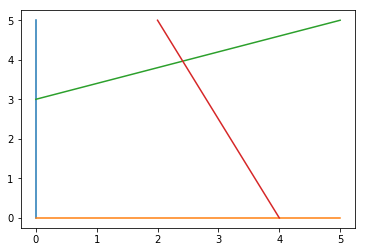

In [30]:
plot([0,0],[0,5],'-',[0,5],[0,0],'-',[0,5],[3,5],[2,4],[5,0]);

The point is, this simplex has only four corners, so to find the minimizer of whatever linear function you have, you just need to check its value at four point. 

Three of the points are obvious: (0,0), (0,3), (4,0). What is the fourth point?

The simplex method works by solving the "active" equalities at a corner, then finding an edge to move along where the objective function will decrease.

We used to teach the details. You can read about them, but maybe it is better to have just a general understanding, then use existing code.



### Comments on simplex method

1. This seems really important if you are modeling an economy, or supplying an army, or running a factory where you have to manage supply
2. You might apply it in your own life. You have constraints on your time, money, movements. Can you maximize your happiness? Or your GPA?
3. A huge challenge is trying to find a formula for happiness, or GPA, based on the amount ot tiem and effort you spend on related tasks. 
4. I've never used the simplex method in my life, even though I do lots of math modeling.
5. We did use the simplex method to automate the assignment of teaching schedules in the department. This turned an onerous, multi-week task into a simple click-and-go solution.
6. So it truly is useful. Even if I haven't used it!

## Constrained optimization